In [1]:
import pandas as pd
import numpy as np
import IPython.display

data = pd.read_csv('./data/filtered_data.csv', usecols=['Id','Title', 'Body', 'Tags'], index_col='Id')
data.reset_index(inplace=True)
data.drop(columns='Id', inplace=True)
data.head(10)

,Title,Body,Tags
0,Can (a== 1 && a ==2 && a==3) ever evaluate to ...,<blockquote>\n <p><strong>Moderator note:</st...,<javascript><ecmascript-6>
1,Git is not working after macOS Update (xcrun: ...,<p>I updated to macOS Mojave (this happens on ...,<xcode><git><macos><command-line><terminal>
2,Why is 2 * (i * i) faster than 2 * i * i in Java?,<p>The following Java program takes on average...,<java><performance><benchmarking><bytecode><jit>
3,Xcode 10 Error: Multiple commands produce,<blockquote>\n <p>error: Multiple commands pr...,<info.plist><xcode10>
4,"Why does array[idx++]+=""a"" increase idx once i...","<p>For a challenge, <a href=""https://stackover...",<java><java-8><javac><java-9><java-10>
5,Difference between npx and npm?,"<p>I have just started learning React, and Fac...",<javascript><npm><npx>
6,Cannot inline bytecode built with JVM target 1...,<p>When trying to run the Example CorDapp (<a ...,<android><intellij-idea><kotlin><jvm><corda>
7,"Could not find module ""@angular-devkit/build-a...","<p>After updating to Angular 6.0.1, I get the ...",<angular><angular-cli><angular6><angular-cli-v6>
8,"How to fix ""ReferenceError: primordials is not...",<p>I have installed Node.js modules by 'npm in...,<node.js><sass><gulp><gulp-sass>
9,Why is the result of ('b'+'a'+ + 'a' + 'a').to...,<p>I was practicing some JavaScript when one o...,<javascript><type-conversion>


## Constitution du corpus 

In [2]:
%%time
data['Post'] = data.apply(lambda x: x['Title'] + ' ' + x['Body'] if x['Title'] == x['Title'] else x['Body'], axis=1)
corpus = data['Post'].to_list()
tags = data['Tags'].to_list()

print("Dix première observations")
display(data.head(10))

print("Premier élément de la liste corpus\n")
display(corpus[0])
print("\n")

print("Premier éléments de la liste tags\n")
display(tags[0])

print(f"Occurences dans le corpus: {len(corpus)}")
print(f"Occurences dans les tags: {len(tags)}")

Dix première observations


,Title,Body,Tags,Post
0,Can (a== 1 && a ==2 && a==3) ever evaluate to ...,<blockquote>\n <p><strong>Moderator note:</st...,<javascript><ecmascript-6>,Can (a== 1 && a ==2 && a==3) ever evaluate to ...
1,Git is not working after macOS Update (xcrun: ...,<p>I updated to macOS Mojave (this happens on ...,<xcode><git><macos><command-line><terminal>,Git is not working after macOS Update (xcrun: ...
2,Why is 2 * (i * i) faster than 2 * i * i in Java?,<p>The following Java program takes on average...,<java><performance><benchmarking><bytecode><jit>,Why is 2 * (i * i) faster than 2 * i * i in Ja...
3,Xcode 10 Error: Multiple commands produce,<blockquote>\n <p>error: Multiple commands pr...,<info.plist><xcode10>,Xcode 10 Error: Multiple commands produce <blo...
4,"Why does array[idx++]+=""a"" increase idx once i...","<p>For a challenge, <a href=""https://stackover...",<java><java-8><javac><java-9><java-10>,"Why does array[idx++]+=""a"" increase idx once i..."
5,Difference between npx and npm?,"<p>I have just started learning React, and Fac...",<javascript><npm><npx>,Difference between npx and npm? <p>I have just...
6,Cannot inline bytecode built with JVM target 1...,<p>When trying to run the Example CorDapp (<a ...,<android><intellij-idea><kotlin><jvm><corda>,Cannot inline bytecode built with JVM target 1...
7,"Could not find module ""@angular-devkit/build-a...","<p>After updating to Angular 6.0.1, I get the ...",<angular><angular-cli><angular6><angular-cli-v6>,"Could not find module ""@angular-devkit/build-a..."
8,"How to fix ""ReferenceError: primordials is not...",<p>I have installed Node.js modules by 'npm in...,<node.js><sass><gulp><gulp-sass>,"How to fix ""ReferenceError: primordials is not..."
9,Why is the result of ('b'+'a'+ + 'a' + 'a').to...,<p>I was practicing some JavaScript when one o...,<javascript><type-conversion>,Why is the result of ('b'+'a'+ + 'a' + 'a').to...


Premier élément de la liste corpus



'Can (a== 1 && a ==2 && a==3) ever evaluate to true? <blockquote>\n  <p><strong>Moderator note:</strong> Please resist the urge to edit the code or remove this notice. The pattern of whitespace may be part of the question and therefore should not be tampered with unnecessarily. If you are in the "whitespace is insignificant" camp, you should be able to accept the code as is.</p>\n</blockquote>\n\n<p>Is it ever possible that <code>(a== 1 &amp;&amp; a ==2 &amp;&amp; a==3)</code> could evaluate to <code>true</code> in JavaScript?</p>\n\n<p>This is an interview question asked by a major tech company. It happened two weeks back, but I\'m still trying to find the answer. I know we never write such code in our day-to-day job, but I\'m curious.</p>\n'



Premier éléments de la liste tags



'<javascript><ecmascript-6>'

Occurences dans le corpus: 46504
Occurences dans les tags: 46504
CPU times: user 517 ms, sys: 13.8 ms, total: 531 ms
Wall time: 527 ms


## Nettoyage HTML

In [3]:
%%time

def clean_html(text):
    """
    Remove HTML from a text.
    
    Args:
        text(String): Row text with html 
             
    Returns:
        cleaned String
    """
    import lxml
    import html5lib
    from bs4 import BeautifulSoup
 
    soup = BeautifulSoup(text, "html5lib")

    for sent in soup(['style', 'script']):
            sent.decompose()
   
        
    return ' '.join(soup.stripped_strings)

corpus_wo_html = [clean_html(text) for text in corpus]

print("Premier élément de la liste corpus sans html\n")
display(corpus_wo_html[0])
print("\n")

print(f"Occurences dans le corpus: {len(corpus_wo_html)}")

Premier élément de la liste corpus sans html



'Can (a== 1 && a ==2 && a==3) ever evaluate to true? Moderator note: Please resist the urge to edit the code or remove this notice. The pattern of whitespace may be part of the question and therefore should not be tampered with unnecessarily. If you are in the "whitespace is insignificant" camp, you should be able to accept the code as is. Is it ever possible that (a== 1 && a ==2 && a==3) could evaluate to true in JavaScript? This is an interview question asked by a major tech company. It happened two weeks back, but I\'m still trying to find the answer. I know we never write such code in our day-to-day job, but I\'m curious.'



Occurences dans le corpus: 46504
CPU times: user 1min 1s, sys: 38.5 ms, total: 1min 1s
Wall time: 1min 1s


### Nettoyage du texte

In [4]:
%%time

def text_cleaning(text):
    """
    Remove figures, punctuation, words shorter than two letters (excepted C or R) in a lowered text. 
    
    Args:
        text(String): Row text to clean
        
    Returns:
       res(string): Cleaned text
    """
    import re
    
    pattern = re.compile(r'[^\w]|[\d_]')
    
    try: 
        res = re.sub(pattern," ", text).lower()
    except TypeError:
        return text
    
    res = res.split(" ")
    res = list(filter(lambda x: len(x)>3 , res)) #Keep singles c and r because it might be used as name of languages
    res = " ".join(res)
    return res

cleaned_corpus = [text_cleaning(text) for text in corpus_wo_html]
cleaned_tags = [text_cleaning(text).strip() for text in tags]


print("Premier élément de la liste cleaned_corpus\n")
display(cleaned_corpus[0])
print("\n")

print("Premier élément de la liste cleaned_tags\n")
display(cleaned_tags[0])
print("\n")

print(f"Occurences dans le corpus nettoyé: {len(cleaned_corpus)}")
print(f"Occurences dans les tags nettoyés: {len(cleaned_tags)}")

Premier élément de la liste cleaned_corpus



'ever evaluate true moderator note please resist urge edit code remove this notice pattern whitespace part question therefore should tampered with unnecessarily whitespace insignificant camp should able accept code ever possible that could evaluate true javascript this interview question asked major tech company happened weeks back still trying find answer know never write such code curious'



Premier élément de la liste cleaned_tags



'javascript ecmascript'



Occurences dans le corpus nettoyé: 46504
Occurences dans les tags nettoyés: 46504
CPU times: user 6.72 s, sys: 29.7 ms, total: 6.75 s
Wall time: 6.75 s


### Tokenization

In [5]:
%%time
def tokenize(text):
    """
    Tokenize words of a text.
    
    Args:
    
        text(String): Row text
        
    Returns
    
        res(list): Tokenized string.
    """
    
    from nltk.corpus import stopwords
    from nltk import word_tokenize
    from nltk.tokenize import sent_tokenize

    stop_words = set(stopwords.words('english'))
    
    try:
        res = word_tokenize(text, language='english')
    except TypeError:
        return text
    
    res = [token for token in res if token not in stop_words]
    return res

tokenized_corpus = [tokenize(text) for text in cleaned_corpus]
tokenized_tags = [tokenize(text) for text in cleaned_tags]

print("Premier élément de la liste tokenized_corpus\n")
display(tokenized_corpus[0])
print("\n")
print(f"Longueur du premier éléments de liste tokenized_corpus: {len(tokenized_corpus[0])}")
print("\n")

print("Premier élément de la liste tokenized_tags\n")
display(tokenized_tags[0])
print('\n')


print(f"Occurences dans le corpus tokenizé: {len(tokenized_corpus)}")
print(f"Occurences dans la liste des tags: {len(tokenized_tags)}")

Premier élément de la liste tokenized_corpus



['ever',
 'evaluate',
 'true',
 'moderator',
 'note',
 'please',
 'resist',
 'urge',
 'edit',
 'code',
 'remove',
 'notice',
 'pattern',
 'whitespace',
 'part',
 'question',
 'therefore',
 'tampered',
 'unnecessarily',
 'whitespace',
 'insignificant',
 'camp',
 'able',
 'accept',
 'code',
 'ever',
 'possible',
 'could',
 'evaluate',
 'true',
 'javascript',
 'interview',
 'question',
 'asked',
 'major',
 'tech',
 'company',
 'happened',
 'weeks',
 'back',
 'still',
 'trying',
 'find',
 'answer',
 'know',
 'never',
 'write',
 'code',
 'curious']



Longueur du premier éléments de liste tokenized_corpus: 49


Premier élément de la liste tokenized_tags



['javascript', 'ecmascript']



Occurences dans le corpus tokenizé: 46504
Occurences dans la liste des tags: 46504
CPU times: user 30.5 s, sys: 1.58 s, total: 32.1 s
Wall time: 31 s


## Filtrage des noms à l'aide d'un modèle de POS tagging

In [6]:
%%time 
def filtering_nouns(tokens):
    """
    Filter singular nouns
    
    Args:
        tokens(list): A list o tokens
        
    
    Returns:
    
        res(list): Filtered token list
    """ 
    
    import nltk
    
    res = nltk.pos_tag(tokens)
    
    res = [token[0] for token in res if token[1] == 'NN']
    
    return res

noun_corpus = [filtering_nouns(tokens) for tokens in tokenized_corpus]

print("Premier élément de la liste noun_corpus\n")
display(noun_corpus[0])
print("\n")

print(f"Longueur du premier éléments de liste noun_corpus: {len(noun_corpus[0])}")
print("\n")


print(f"Occurences dans le corpus tokenizé: {len(noun_corpus)}")

Premier élément de la liste noun_corpus



['moderator',
 'note',
 'please',
 'edit',
 'code',
 'notice',
 'pattern',
 'part',
 'question',
 'whitespace',
 'insignificant',
 'camp',
 'accept',
 'code',
 'javascript',
 'interview',
 'question',
 'tech',
 'company',
 'answer',
 'code']



Longueur du premier éléments de liste noun_corpus: 21


Occurences dans le corpus tokenizé: 46504
CPU times: user 3min 19s, sys: 201 ms, total: 3min 19s
Wall time: 3min 19s


## Lemmatisation

In [7]:
%%time
def lemmatization(tokens):
    """
    Transform tokens into lems 
    
    Args:
        tokens(list): List of tokens
        
    Returns:
        lemmatized(list): List of lemmatized tokens
    """
    import nltk
    from nltk.stem import WordNetLemmatizer
    
    lemmatizer = WordNetLemmatizer()
    lemmatized = []
    
    for token in tokens:
        lemmatized.append(lemmatizer.lemmatize(token))
        
    return lemmatized

lemmatized_corpus = [lemmatization(tokens) for tokens in noun_corpus]
lemmatized_tags = [lemmatization(tokens) for tokens in tokenized_tags]

tags_wo_blanks = []
for tokens in lemmatized_tags:
    tokens = [token for token in tokens if len(token)>1]
    tags_wo_blanks.append(tokens)

print("Premier élément de la liste lemmatized_corpus\n")
display(lemmatized_corpus[0])
print("\n")

print(f"Longueur du premier éléments de liste lemmatized_corpus: {len(lemmatized_corpus[0])}")
print("\n")

print("Premier élément de la liste lemmatized_tags\n")
display(tags_wo_blanks[0])


print(f"Occurences dans le corpus lemmatisé: {len(lemmatized_corpus)}")
print(f"Occurences dans les tags lemmatisés: {len(tags_wo_blanks)}")

Premier élément de la liste lemmatized_corpus



['moderator',
 'note',
 'please',
 'edit',
 'code',
 'notice',
 'pattern',
 'part',
 'question',
 'whitespace',
 'insignificant',
 'camp',
 'accept',
 'code',
 'javascript',
 'interview',
 'question',
 'tech',
 'company',
 'answer',
 'code']



Longueur du premier éléments de liste lemmatized_corpus: 21


Premier élément de la liste lemmatized_tags



['javascript', 'ecmascript']

Occurences dans le corpus lemmatisé: 46504
Occurences dans les tags lemmatisés: 46504
CPU times: user 7.3 s, sys: 20.1 ms, total: 7.32 s
Wall time: 7.31 s


### Filtrage des valeurs vides

In [8]:
joined_corpus = [" ".join(text) for text in lemmatized_corpus]
corpus_df = pd.DataFrame(joined_corpus, columns=['preprocessed_text'])
corpus_df['len_text'] = corpus_df['preprocessed_text'].apply(lambda x: len(x))

joined_tags = [" ".join(tags) for tags in tags_wo_blanks]
tag_df = pd.DataFrame(joined_tags, columns=['preprocessed_tags'])
tag_df['len_tags'] = tag_df['preprocessed_tags'].apply(lambda x: len(x))

corpus_tag_df = pd.concat([corpus_df, tag_df], axis=1)

empty_data_idx = corpus_tag_df[(corpus_tag_df['len_text']==0) | (corpus_tag_df['len_tags']==0)].index

corpus_tag_df.drop(index=empty_data_idx, inplace=True)
data.drop(index=empty_data_idx, inplace=True)

print(f"observations restantes du corpus traité: {corpus_tag_df.shape[0]}")
print(f"Observations restante du corpus original: {data.shape[0]}")


corpus_tag_df['splitted_text'] = corpus_tag_df['preprocessed_text'].apply(lambda x: x.split(' ') )
corpus_tag_df['splitted_tags'] = corpus_tag_df['preprocessed_tags'].apply(lambda x: x.split(' ') )

filtered_corpus = corpus_tag_df['splitted_text'].to_list()
filtered_tags = corpus_tag_df['splitted_tags'].to_list()
filtered_original_posts = data['Post'].to_list()

filtered_tokenized_vs_original = pd.concat([data['Post'],
                                            corpus_tag_df['splitted_text'], 
                                            corpus_tag_df['splitted_tags']],
                                            axis=1)

filtered_tokenized_vs_original.to_csv("./data/cleaned_corpus.csv", index=False)
filtered_tokenized_vs_original.to_pickle('./data/cleaned_corpus.pkl')

filtered_tokenized_vs_original.head(10)

observations restantes du corpus traité: 45902
Observations restante du corpus original: 45902


,Post,splitted_text,splitted_tags
0,Can (a== 1 && a ==2 && a==3) ever evaluate to ...,"[moderator, note, please, edit, code, notice, ...","[javascript, ecmascript]"
1,Git is not working after macOS Update (xcrun: ...,"[macos, error, developer, path, developer, the...","[xcode, macos, command, line, terminal]"
2,Why is 2 * (i * i) faster than 2 * i * i in Ja...,"[java, program, void, string, args, starttime,...","[java, performance, benchmarking, bytecode]"
3,Xcode 10 Error: Multiple commands produce <blo...,"[xcode, error, error, developer, deriveddata, ...","[info, plist, xcode]"
4,"Why does array[idx++]+=""a"" increase idx once i...","[increase, java, challenge, code, code, import...","[java, java, javac, java, java]"
5,Difference between npx and npm? <p>I have just...,"[difference, react, facebook, setup, project, ...",[javascript]
6,Cannot inline bytecode built with JVM target 1...,"[inline, bytecode, target, bytecode, target, e...","[android, intellij, idea, kotlin, corda]"
7,"Could not find module ""@angular-devkit/build-a...","[devkit, error, serve, devkit, home, error, de...","[angular, angular, angular, angular]"
8,"How to fix ""ReferenceError: primordials is not...","[referenceerror, node, sas, watch, command, pr...","[node, sas, gulp, gulp, sas]"
9,Why is the result of ('b'+'a'+ + 'a' + 'a').to...,"[result, tolowercase, banana, javascript, java...","[javascript, type, conversion]"


## Fréquence de distribution tokens

In [9]:
%%time
def build_word_distribution(corpus):
    """
    Build corpus word distribution
    
    Args:
        Corpus(List of lists): Original corpus
    
    Returns:
        
        word_dist_df(DataFrame): Word distribution of the corpus
    """
    
    from nltk import FreqDist
    word_corpus = [token for token_list in lemmatized_corpus for token in token_list]
    word_dist = FreqDist(word_corpus)
    word_dist_df = pd.DataFrame(word_dist.items(), columns=['Word', 'Frequency']).set_index('Word')
    word_dist_df.sort_values("Frequency", ascending=False, inplace=True)

    return word_dist_df

word_dist = build_word_distribution(filtered_corpus)

print(f"Nombre de tokens du corpus {word_dist.shape[0]}")
print("Affichage des 20 tokens les plus utilisés")
display(word_dist.head(20))

Nombre de tokens du corpus 115091
Affichage des 20 tokens les plus utilisés


,Frequency
Word,
java,45874
error,42873
class,33461
name,31880
file,30588
import,27939
code,25988
version,23508
http,22847


CPU times: user 1.12 s, sys: 20.1 ms, total: 1.14 s
Wall time: 1.13 s


## Fréquence de distribution des tags

In [10]:
tag_dist = build_word_distribution(filtered_tags)
print("Top 20 des tags les plus utilisés")
display(tag_dist.head(20))
print(f"Nombre de tags: {len(tag_dist)}")
first_200_tags = tag_dist[0:200].index.to_list()

Top 20 des tags les plus utilisés


,Frequency
Word,
java,45874
error,42873
class,33461
name,31880
file,30588
import,27939
code,25988
version,23508
http,22847


Nombre de tags: 115091


In [11]:
'command' in first_200_tags

True

### filtrage top 200 tags

In [12]:
filtered_corpus_tag_df = corpus_tag_df.copy()
filtered_corpus_tag_df['tags_in_top200'] = filtered_corpus_tag_df['splitted_tags'].apply(lambda tags: [tag for tag in tags if tag in first_200_tags])

filtered_corpus_tag_df['len_tags_in_top200'] = filtered_corpus_tag_df['tags_in_top200'].apply(lambda x: len(x))
missing_filtered_data = filtered_corpus_tag_df[filtered_corpus_tag_df['len_tags_in_top200'] == 0].index

filtered_corpus_tag_df.drop(index=missing_filtered_data, inplace=True)
data.drop(index=missing_filtered_data, inplace=True)
print(f"Observations restantes dans le coprus traité: {filtered_corpus_tag_df.shape[0]}")
print(f"Observations restantes dans le corpus original: {data.shape[0]}")

top200_corpus = filtered_corpus_tag_df['splitted_text'].to_list()
top200_joined_corpus = filtered_corpus_tag_df['preprocessed_text'].to_list()
top200_tags = filtered_corpus_tag_df['tags_in_top200'].to_list()

Observations restantes dans le coprus traité: 33169
Observations restantes dans le corpus original: 33169


### Fréquences de distribution des tokens après filtrage du top 200 tags

In [13]:
word_dist_top200 = build_word_distribution(top200_corpus)

print(f"Nombre de tokens du corpus {word_dist_top200.shape[0]}")
print("Affichage des 20 tokens les plus utilisés")
display(word_dist_top200.head(20))
word_dist_top200[word_dist_top200["Frequency"]>=1000].shape[0]

Nombre de tokens du corpus 115091
Affichage des 20 tokens les plus utilisés


,Frequency
Word,
java,45874
error,42873
class,33461
name,31880
file,30588
import,27939
code,25988
version,23508
http,22847


476

### Fréquences de distribution des tags après filtrage du top 200 tags

In [14]:
tag_dist_top_200 = build_word_distribution(top200_tags)
print("Top 20 des tags les plus utilisés")
display(tag_dist_top_200.head(20))
print(f"Nombre de tags: {len(tag_dist_top_200)}")

Top 20 des tags les plus utilisés


,Frequency
Word,
java,45874
error,42873
class,33461
name,31880
file,30588
import,27939
code,25988
version,23508
http,22847


Nombre de tags: 115091


In [15]:
tag_dist_top_200[tag_dist_top_200.index=='command']

,Frequency
Word,
command,8097


### TF-IDF

In [16]:
%%time
from sklearn.feature_extraction.text import TfidfVectorizer
vocabulary = list(word_dist_top200[word_dist_top200["Frequency"]>=1000].index)
tfidf_vectorizer = TfidfVectorizer(vocabulary=vocabulary)
X = tfidf_vectorizer.fit_transform(top200_joined_corpus)
tfidf_data = pd.DataFrame(X.toarray(), columns=vocabulary)
tfidf_data
tfidf_data.shape[0]

CPU times: user 908 ms, sys: 60.1 ms, total: 968 ms
Wall time: 966 ms


33169

### Dédoublonnage des labels

In [17]:
dedup_tags = []
for tags in top200_tags:
    dedup_tags.append(set(tags))

print('Affichage de la première occurence de dedup_tags')
display(dedup_tags[0])

Affichage de la première occurence de dedup_tags


{'command', 'line'}

### Partition des données

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tfidf_data, dedup_tags, test_size=0.2, random_state=42)

## Réduction des données

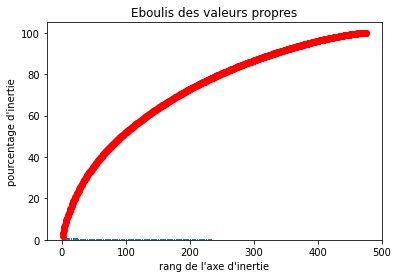

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(random_state=42)
pca.fit(X_train)


def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.show(block=False)

display_scree_plot(pca)

In [20]:
pca = PCA(n_components=0.85, random_state=42)
pca.fit(X_train)
X_train_transformed = pca.transform(X_train)
X_test_transformed = pca.transform(X_test)
print(f"Nombre de composantes principales: {pca.components_.shape[0]}")

Nombre de composantes principales: 287


## Vectorisaton des labels

In [21]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer(classes=first_200_tags)
train_labels = mlb.fit_transform(y_train)
test_labels = mlb.transform(y_test)

In [22]:
mlb.classes_

array(['java', 'error', 'class', 'name', 'file', 'import', 'code',
       'version', 'http', 'value', 'return', 'function', 'type', 'test',
       'core', 'python', 'line', 'json', 'project', 'image',
       'application', 'android', 'module', 'spring', 'list', 'path',
       'server', 'const', 'package', 'springframework', 'system',
       'release', 'time', 'example', 'component', 'request', 'default',
       'view', 'state', 'client', 'problem', 'message', 'service',
       'index', 'response', 'method', 'text', 'docker', 'button', 'node',
       'input', 'model', 'flutter', 'user', 'support', 'react', 'work',
       'command', 'size', 'page', 'output', 'google', 'form', 'create',
       'boot', 'access', 'date', 'item', 'string', 'color', 'config',
       'container', 'site', 'html', 'result', 'build', 'exception',
       'script', 'home', 'column', 'apache', 'context', 'info',
       'dependency', 'print', 'call', 'help', 'password', 'style',
       'something', 'none', 'post', 'b

### Fonction d'évaluation des modèles

In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, hamming_loss

models_performance = {}

def metrics_report(model_name, test_labels, predictions):
    accuracy = accuracy_score(test_labels, predictions)

    macro_precision = precision_score(test_labels, predictions, average='macro')
    macro_recall = recall_score(test_labels, predictions, average='macro')
    macro_f1 = f1_score(test_labels, predictions, average='macro')

    micro_precision = precision_score(test_labels, predictions, average='micro')
    micro_recall = recall_score(test_labels, predictions, average='micro')
    micro_f1 = f1_score(test_labels, predictions, average='micro')
    hamLoss = hamming_loss(test_labels, predictions)
    print("------" + model_name + " Model Metrics-----")
    print("Accuracy: {:.4f}\nHamming Loss: {:.4f}\nPrecision:\n  - Macro: {:.4f}\n  - Micro: {:.4f}\nRecall:\n  - Macro: {:.4f}\n  - Micro: {:.4f}\nF1-measure:\n  - Macro: {:.4f}\n  - Micro: {:.4f}"\
          .format(accuracy, hamLoss, macro_precision, micro_precision, macro_recall, micro_recall, macro_f1, micro_f1))
    models_performance[model_name] = micro_f1

### KNN

In [24]:
%%time
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_transformed, train_labels)
knn_predictions = knn_clf.predict(X_test_transformed)
metrics_report("knn", test_labels, knn_predictions)

/home/cedric/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cedric/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cedric/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1492: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(


------knn Model Metrics-----
Accuracy: 0.2739
Hamming Loss: 0.0061
Precision:
  - Macro: 0.2078
  - Micro: 0.7488
Recall:
  - Macro: 0.0835
  - Micro: 0.3657
F1-measure:
  - Macro: 0.1107
  - Micro: 0.4914
CPU times: user 31.9 s, sys: 10.3 s, total: 42.2 s
Wall time: 27.7 s


### SVM

In [25]:
%%time
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsRestClassifier

svm_clf = OneVsRestClassifier(LinearSVC(), n_jobs=-1)
svm_clf.fit(X_train_transformed, train_labels)

svm_preds = svm_clf.predict(X_test_transformed)
metrics_report("svm", test_labels, svm_preds)

/home/cedric/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cedric/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cedric/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1492: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(


------svm Model Metrics-----
Accuracy: 0.3289
Hamming Loss: 0.0051
Precision:
  - Macro: 0.2060
  - Micro: 0.8367
Recall:
  - Macro: 0.0858
  - Micro: 0.4482
F1-measure:
  - Macro: 0.1090
  - Micro: 0.5837
CPU times: user 4.3 s, sys: 7.57 s, total: 11.9 s
Wall time: 13.2 s


### Random Forest

In [26]:
%%time
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_jobs=-1)
rf_clf.fit(X_train_transformed, train_labels)
rf_preds = rf_clf.predict(X_test_transformed)
metrics_report("Random Forest", test_labels, rf_preds)

/home/cedric/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cedric/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cedric/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1492: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(


------Random Forest Model Metrics-----
Accuracy: 0.1979
Hamming Loss: 0.0062
Precision:
  - Macro: 0.1398
  - Micro: 0.9091
Recall:
  - Macro: 0.0309
  - Micro: 0.2474
F1-measure:
  - Macro: 0.0448
  - Micro: 0.3890
CPU times: user 28min 36s, sys: 8.09 s, total: 28min 44s
Wall time: 1min 58s


### Gradient boosting

In [29]:
%%time
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.multiclass import OneVsRestClassifier

gb_clf = OneVsRestClassifier(GradientBoostingClassifier())
gb_clf.fit(X_train_transformed, train_labels)
gb_preds = gb_clf.predict(X_test_transformed)
metrics_report("Gradient Boosting", test_labels, gb_preds)

/home/cedric/.local/lib/python3.8/site-packages/sklearn/multiclass.py:80: UserWarning: Label not 27 is present in all training examples.
  warnings.warn("Label %s is present in all training examples." %
/home/cedric/.local/lib/python3.8/site-packages/sklearn/multiclass.py:80: UserWarning: Label not 29 is present in all training examples.
  warnings.warn("Label %s is present in all training examples." %
/home/cedric/.local/lib/python3.8/site-packages/sklearn/multiclass.py:80: UserWarning: Label not 67 is present in all training examples.
  warnings.warn("Label %s is present in all training examples." %
/home/cedric/.local/lib/python3.8/site-packages/sklearn/multiclass.py:80: UserWarning: Label not 86 is present in all training examples.
  warnings.warn("Label %s is present in all training examples." %
/home/cedric/.local/lib/python3.8/site-packages/sklearn/multiclass.py:80: UserWarning: Label not 89 is present in all training examples.
  warnings.warn("Label %s is present in all trainin

------Gradient Boosting Model Metrics-----
Accuracy: 0.2341
Hamming Loss: 0.0069
Precision:
  - Macro: 0.1263
  - Micro: 0.6042
Recall:
  - Macro: 0.0840
  - Micro: 0.4093
F1-measure:
  - Macro: 0.0980
  - Micro: 0.4880
CPU times: user 9h 54min 18s, sys: 447 ms, total: 9h 54min 18s
Wall time: 9h 54min 27s


### Résultats

In [30]:
%%time
print("  Model Name " + " "*10 + "| Micro-F1 Score")
print("-------------------------------------------")
for key, value in models_performance.items():
    print("  " + key, " "*(20-len(key)) + "|", value)
    print("-------------------------------------------")

  Model Name           | Micro-F1 Score
-------------------------------------------
  knn                  | 0.49140049140049136
-------------------------------------------
  svm                  | 0.5837098546831115
-------------------------------------------
  Random Forest        | 0.389003537735849
-------------------------------------------
  Gradient Boosting    | 0.4879821129122415
-------------------------------------------
CPU times: user 4.76 ms, sys: 16 µs, total: 4.77 ms
Wall time: 2.31 ms
